<a href="https://colab.research.google.com/github/TejaswiniU/INSE6220/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

 #from pycaret.classification import *
 #clf = setup(data=data, target='class', train_size=0.7, session_id=123)

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()
from keras.models import Model 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()


print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)


#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/TejaswiniU/INSE6220/main/dataset.csv')
df.head(25)

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


from pycaret.classification import *
clf = setup(data=data, target='sl', train_size=0.7, session_id=123)


#show the best model and their statistics
best_model = compare_models()

print(best_model)


Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    0.9975  1.0000  0.9975  0.9978   
gbc          Gradient Boosting Classifier    0.9949  1.0000  0.9950  0.9955   
dt               Decision Tree Classifier    0.9924  0.9952  0.9924  0.9932   
ridge                    Ridge Classifier    0.8585  0.0000  0.8587  0.8733   
svm                   SVM - Linear Kernel    0.6586  0.0000  0.6519  0.6017   
ada                  Ada Boost Classifier    0.6086  0.8592  0.6003  0.5004   
dummy                    Dummy Classifier    0.2172  0.5000  0.2000  0.0473   
qda       Quadratic Discriminant Analysis    0.1996  0.0000  0.2000  0.0399   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.747  
knn       1.0000  1.0000  1.0000     0.126  
nb        1.0000  1.0000  1.0000     0.021  
rf        1.0000  1.0000  1.0000     0.481  
lda       1.0000  1.0000  1.0000     0.021  
et        1.0000  1.0000  1.0000     0.455  
lightgbm  0.9975  0.9969  0.9970     0.135  
gbc       0.9949  0.9936  0.9938     0.464  
dt        0.9923  0.9905  0.9907     0.021  
ridge     0.8576  0.8232  0.8274     0.016  
svm       0.5840  0.5725  0.6244     0.065  
ada       0.5150  0.5113  0.6049     0.126  
dummy     0.0777  0.0000  0.0000     0.015  
qda       0.0665  0.0000  0.0000     0.019

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [32]:
top3 = compare_models(n_select=3)

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
qda       Quadratic Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
gbc          Gradient Boosting Classifier    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
svm                   SVM - Linear Kernel    0.9569  0.0000  0.9569  0.9556   
ridge                    Ridge Classifier    0.7068  0.0000  0.6971  0.7332   
ada                  Ada Boost Classifier    0.6085  0.8592  0.6000  0.4799   
dummy                    Dummy Classifier    0.2172  0.5000  0.2000  0.0473   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.066  
knn       1.0000  1.0000  1.0000     0.158  
nb        1.0000  1.0000  1.0000     0.038  
dt        1.0000  1.0000  1.0000     0.036  
rf        1.0000  1.0000  1.0000     0.593  
qda       1.0000  1.0000  1.0000     0.033  
gbc       1.0000  1.0000  1.0000     0.446  
lda       1.0000  1.0000  1.0000     0.021  
et        1.0000  1.0000  1.0000     0.503  
lightgbm  1.0000  1.0000  1.0000     0.163  
svm       0.9498  0.9461  0.9519     0.080  
ridge     0.6644  0.6316  0.6525     0.023  
ada       0.5118  0.5113  0.6053     0.184  
dummy     0.0777  0.0000  0.0000     0.026

In [33]:
print(top3)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), GaussianNB(priors=None, var_smoothing=1e-09)]


In [2]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9750  0.9844  0.9778  0.9778  0.9750  0.9687  0.9695
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9744  0.9839  0.9750  0.9772  0.9743  0.9679  0.9687
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9744  0.9839  0.9714  0.9772  0.9741  0.9678  0.9686
Mean    0.9924  0.9952  0.9924  0.9932  0.9923  0.9905  0.9907
SD      0.0117  0.0073  0.0117  0.0104  0.0117  0.0146  0.0142

In [3]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [4]:
tuned_dt = tune_model(dt)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9750  0.9844  0.9778  0.9778  0.9750  0.9687  0.9695
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9744  0.9839  0.9750  0.9772  0.9743  0.9679  0.9687
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9949  0.9968  0.9953  0.9955  0.9949  0.9937  0.9938
SD      0.0101  0.0064  0.0095  0.0090  0.0101  0.0127  0.0124

In [5]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [6]:
!pip install statsmodels --upgrade


     |████████████████████████████████| 9.8 MB 5.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [7]:
evaluate_model(tuned_dt)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [8]:
knn = create_model('knn')


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [9]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

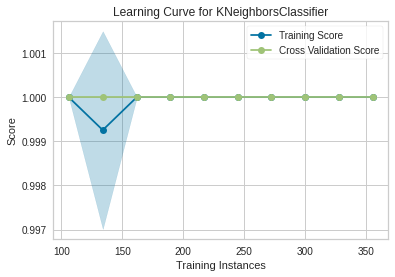

In [10]:
evaluate_model(tuned_knn)


In [11]:
lr = create_model('lr')


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [12]:
tuned_lr = tune_model(lr)


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [34]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 432x288 with 0 Axes>

In [13]:
rf = create_model('rf')


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [14]:
tuned_rf = tune_model(rf)


Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3        0.975  1.0  0.9778  0.9778  0.9750  0.9687  0.9695
4        0.975  1.0  0.9750  0.9778  0.9749  0.9688  0.9695
5        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
7        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9        1.000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean     0.995  1.0  0.9953  0.9956  0.9950  0.9937  0.9939
SD       0.010  0.0  0.0095  0.0089  0.0100  0.0125  0.0122

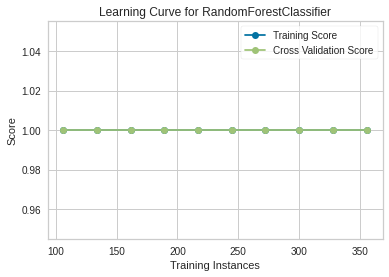

In [15]:
evaluate_model(tuned_rf)


In [16]:
tuned_best_model = tune_model(best_model)


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [17]:
tuned_best_model


LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
evaluate_model(tuned_best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
clf_pca = setup(data=data, target='sl', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


Description             Value
0                               session_id               123
1                                   Target                sl
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (567, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (396, 3)
12                    Transformed Test Set          (171, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f3d8
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [20]:
best_model_pca = compare_models()


Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
qda       Quadratic Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
gbc          Gradient Boosting Classifier    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
svm                   SVM - Linear Kernel    0.9569  0.0000  0.9569  0.9556   
ridge                    Ridge Classifier    0.7068  0.0000  0.6971  0.7332   
ada                  Ada Boost Classifier    0.6085  0.8592  0.6000  0.4799   
dummy                    Dummy Classifier    0.2172  0.5000  0.2000  0.0473   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.044  
knn       1.0000  1.0000  1.0000     0.122  
nb        1.0000  1.0000  1.0000     0.019  
dt        1.0000  1.0000  1.0000     0.021  
rf        1.0000  1.0000  1.0000     0.487  
qda       1.0000  1.0000  1.0000     0.020  
gbc       1.0000  1.0000  1.0000     0.450  
lda       1.0000  1.0000  1.0000     0.021  
et        1.0000  1.0000  1.0000     0.468  
lightgbm  1.0000  1.0000  1.0000     0.097  
svm       0.9498  0.9461  0.9519     0.066  
ridge     0.6644  0.6316  0.6525     0.014  
ada       0.5118  0.5113  0.6053     0.116  
dummy     0.0777  0.0000  0.0000     0.017

In [21]:
best_model_pca


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [23]:
tuned_best_model_pca


LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

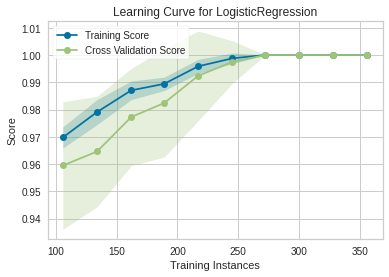

In [24]:
evaluate_model(tuned_best_model_pca)


In [25]:
!pip install shap


     |████████████████████████████████| 564 kB 5.1 MB/s 


In [26]:
import shap


In [39]:
rf_pca = create_model('rf')


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

In [40]:
tuned_rf_pca = tune_model(rf_pca)


Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

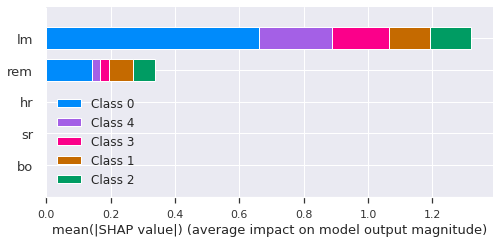

In [45]:
interpret_model(tuned_rf_pca, plot='summary')


In [43]:
interpret_model(tuned_rf_pca, plot='reason', observation=35)


In [31]:
interpret_model(tuned_rf_pca, plot='reason')
